<a href="https://colab.research.google.com/github/KaoruGitty/kaoru_private/blob/main/20250707_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


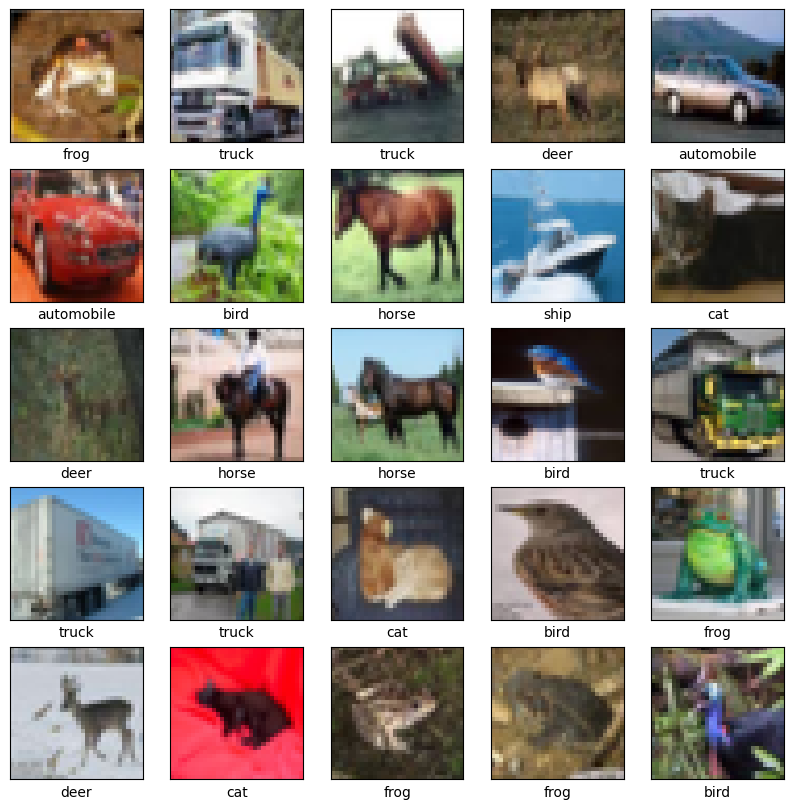

In [6]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [8]:
model = keras.Sequential([
  keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3)),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Dropout(0.25),

  keras.layers.Conv2D(64, (3,3), activation = 'relu'),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Dropout(0.25),

  keras.layers.Conv2D(128, (3,3), activation = 'relu'),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Dropout(0.25),

  keras.layers.Flatten(),
  keras.layers.Dense(128, activation = 'relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.5),

  keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,610 (631.29 KB)

 Trainable params: 160,906 (628.54 KB)

 Non-trainable params: 704 (2.75 KB)

In [9]:
# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy',
#               metrics = ['accuracy'])

In [10]:
experiment_settings = [
    {"batch_size": 64, "epochs": 5, "label": "Batch 64, Epoch 5"},
    {"batch_size": 64, "epochs": 20, "label": "Batch 64, Epoch 20"},
    {"batch_size": 32, "epochs": 20, "label": "Batch 32, Epoch 20"},
    {"batch_size": 128, "epochs": 20, "label": "Batch 128, Epoch 20"},
]

In [11]:
all_histories = []

In [12]:
for setting in experiment_settings:
  print(f'-------学習開始:{setting["label"]}-------')
  model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

  history = model.fit(train_images, train_labels,
                    epochs = setting["epochs"],
                    batch_size = setting["batch_size"],
                    validation_split = 0.1,
                    verbose = 1)

  all_histories.append({"history": history.history, "labels": setting["label"]})
  print(f'-------学習終了:{setting["label"]}-------')

-------学習開始:Batch 64, Epoch 5-------
Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.3025 - loss: 2.1800 - val_accuracy: 0.4408 - val_loss: 1.6671
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4987 - loss: 1.3922 - val_accuracy: 0.4850 - val_loss: 1.4874
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5623 - loss: 1.2327 - val_accuracy: 0.6354 - val_loss: 1.0344
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5981 - loss: 1.1375 - val_accuracy: 0.6174 - val_loss: 1.0697
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6322 - loss: 1.0537 - val_accuracy: 0.6190 - val_loss: 1.0797
-------学習終了:Batch 64, Epoch 5-------
-------学習開始:Batch 64, Epoch 20-------
Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.6457 - loss: 1.0171 - val_accuracy: 0.7122 - val_loss: 0.8417
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6693 - loss: 0.9562 - val_accuracy: 0.6708 - val_loss:

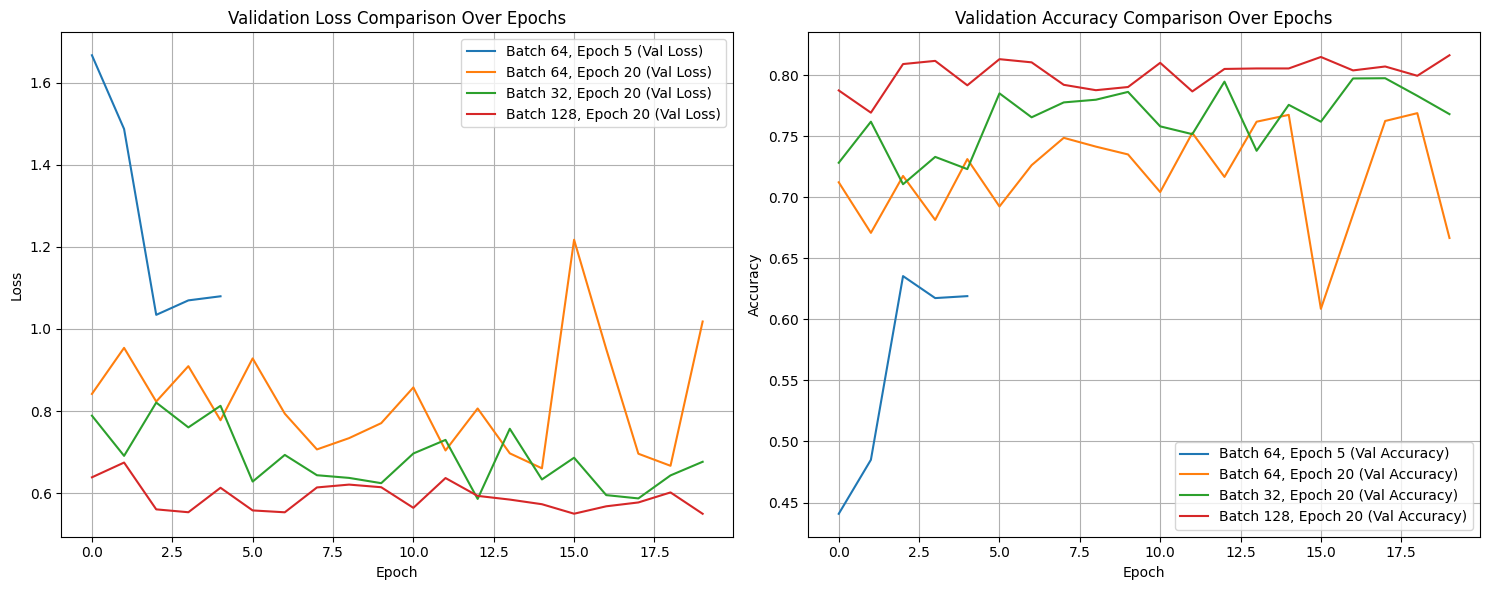

313/313 - 2s - 6ms/step - accuracy: 0.8047 - loss: 0.5724


In [17]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
for hist_data in all_histories:
    plt.plot(hist_data['history']['val_loss'], label=f"{hist_data['labels']} (Val Loss)")
plt.title('Validation Loss Comparison Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for hist_data in all_histories:
    plt.plot(hist_data['history']['val_accuracy'], label=f"{hist_data['labels']} (Val Accuracy)")
plt.title('Validation Accuracy Comparison Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

loss, accuracy = model.evaluate(test_images, test_labels, verbose=2)

In [19]:
print(f'\nテスト損失: {loss:.4f}')
print(f'テスト精度: {accuracy:.4f}')


テスト損失: 0.5724
テスト精度: 0.8047
